# Latar Belakang

Sebuah perusahaan yang bergerak di bidang <i>Content Creation</i> ingin membuat sebuah <i>Youtube Channel</i>. Perusahaan ingin membuat video yang bisa diterima dan disukai oleh masyarakat di US.

Kita akan coba menganalisa dan menarik kesimpulan dari Dataset <b>USVideos</b> yang berisi data video-video Youtube yang trending di Region US dari tahun 2017-2018, jenis video seperti apa yang diterima dan disukai oleh masyarakat di US.

# Library

Pertama-tama saya melakukan import untuk <i>library - library</i> yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Data

Lalu saya lakukan load pada data video yang sudah ada dalam bentuk csv dan data category video dalam bentuk json

### Load Data Video

In [2]:
df_videos = pd.read_csv('USvideos.csv')

In [3]:
df_videos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [4]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Dari informasi di atas, dapat dilihat bahwa ada beberapa data kosong pada kolom <i>description</i>. Tetapi karena kolom deskripsi pada data ini tidak relevan terhadap analisa, maka kita tidak lakukan drop pada data yang memiliki <i>description</i> kosong, agar kita tetap dapat melakukan analisa pada kolom selain <i>description</i>.

### Load data Category Video

In [5]:
df_category_json = pd.read_json('US_category_id.json')

In [6]:
df_category_json

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


## Data Preprocessing

Dari data di atas, dapat dilihat bahwa kolom item berisi data dengan format menyerupai <i>Dictionary</i>. 

In [7]:
pd.DataFrame(dict(df_category_json['items']))

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
kind,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,...,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory,youtube#videoCategory
etag,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...","""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...","""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...","""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...","""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...","""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...","""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...","""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...","""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...","""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",...,"""m2yskBQFythfE4irbTIeOgYYfBU/Xb5JLhtyNRN3AQq02...","""m2yskBQFythfE4irbTIeOgYYfBU/u8WXzF4HIhtEi805_...","""m2yskBQFythfE4irbTIeOgYYfBU/D04PP4Gr7wc4IV_O9...","""m2yskBQFythfE4irbTIeOgYYfBU/i5-_AceGXQCEEMWU0...","""m2yskBQFythfE4irbTIeOgYYfBU/rtlxd0zOixA9QHdIZ...","""m2yskBQFythfE4irbTIeOgYYfBU/N1TrDFLRppxZgBowC...","""m2yskBQFythfE4irbTIeOgYYfBU/7UMGi6zRySqXopr_r...","""m2yskBQFythfE4irbTIeOgYYfBU/RScXhi324h8usyIet...","""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...","""m2yskBQFythfE4irbTIeOgYYfBU/x5NxSf5fz8hn4loSN..."
id,1,2,10,15,17,18,19,20,21,22,...,35,36,37,38,39,40,41,42,43,44
snippet,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",...,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...","{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."


data di atas merupakan isi dari kolom Items yang sudah diubah kedalam bentuk dataframe, data di atas dapat di Transpose agar lebih mudah dimengerti.

In [8]:
pd.DataFrame(dict(df_category_json['items'])).T

,kind,etag,id,snippet
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
5,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
6,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
7,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
8,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
9,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."


Dapat dilihat dari data di atas bahwa kolom <i>snippet</i> berisi data yang menyerupai <i>Dictionary</i> juga. Kita akan coba olah data <i>snippet</i>.

In [9]:
category = pd.DataFrame(dict(pd.DataFrame(dict(df_category_json['items'])).T['snippet'])).T
category

,channelId,title,assignable
0,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


Data pada kolom <i>snippet</i> sudah disimpan ke dalam variabel Category dalam bentuk DataFrame.

In [10]:
id = pd.DataFrame(dict(df_category_json['items'])).T['id']
id

0      1
1      2
2     10
3     15
4     17
5     18
6     19
7     20
8     21
9     22
10    23
11    24
12    25
13    26
14    27
15    28
16    29
17    30
18    31
19    32
20    33
21    34
22    35
23    36
24    37
25    38
26    39
27    40
28    41
29    42
30    43
31    44
Name: id, dtype: object

Lalu saya menyimpan data id dari file Json di atas untuk membentuk DataFrame baru yang berisi ID dan Category Video.

In [11]:
df_category = pd.concat([id,category],axis=1)
df_category

,id,channelId,title,assignable
0,1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


sudah didapatkan DataFrame dengan nama variabel <i>df_category</i> yang berisi ID beserta category video-nya, yang akan kita merge dengan DataFrame <i>df_videos</i> yang berisi informasi tentang video-video yang pernah trending di Youtube.

In [12]:
display(df_category.dtypes,df_videos.dtypes)

id            object
channelId     object
title         object
assignable    object
dtype: object

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

Dapat dilihat bahwa tipe data <b><i>category_id</i></b> dari <b>df_videos</b> berbeda dengan tipe data <b><i>id</i></b> dari <b>df_category</b>.<br> Saya akan mengubah tipe data <b><i>id</i></b> agar sama dengan tipe data <b><i>category_id</i></b>.

In [13]:
df_category = df_category.astype({'id':'int64'})

Lalu saya akan membuat DataFrame baru dengan melakukan merge pada DataFrame <b>df_videos</b> dan <b>df_category</b>.

In [14]:
#Menggabungkan DataFrame berisi Video dan DataFrame berisi Category
df_videos_merged = pd.merge(df_videos,df_category,left_on='category_id',right_on='id')
df_videos_merged

,video_id,trending_date,title_x,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,channelId,title_y,assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False


Kita sudah memiliki DataFrame <b>df_videos_merged</b> yang berisi data Video dan Category-nya yang memiliki informasi lengkap.<br>
Kita akan melakukan sedikit lagi <i>Data Preprocessing</i> agar data lebih rapih dan mudah dimengerti.

In [15]:
df_videos_merged.rename(columns={'title_x':'video_title','title_y':'category_name'},inplace=True)

Saya lakukan <i>rename</i> pada kolom <i>title_x</i> dan <i>title_y</i> agar lebih mudah dimengerti.<br>
Setelah itu saya lakukan splitting pada kolom <i>publish_time</i> agar mendapatkan 2 kolom berisi tanggal publish dan jam publish.

In [16]:
df_publish_date = pd.DataFrame(df_videos_merged['publish_time'].str.split('T',expand=True))
df_publish_date

,0,1
0,2017-11-13,17:13:01.000Z
1,2017-04-21,06:47:32.000Z
2,2017-11-11,15:00:03.000Z
3,2017-11-11,18:08:04.000Z
4,2017-11-11,01:19:33.000Z
...,...,...
40944,2018-05-10,21:01:22.000Z
40945,2018-05-10,21:01:22.000Z
40946,2018-05-10,21:01:22.000Z
40947,2018-05-10,21:01:22.000Z


hasil Splitting data <i>publish_time</i> sudah disimpan di variabel <i>df_publish_date</i>. Selanjutnya saya akan melakukan <b>merge</b> <i>df_publish_date</i> dengan <i>df_videos_merged</i>, dan melakukan drop pada beberapa kolom yang tidak relevan dengan analisa agar mendapatkan data yang lebih ideal untuk dianalisa.

In [17]:
#Menggabungkan DataFrame video dan publish date yang sudah dilakukan splitting
df_videos_merged = pd.concat([df_videos_merged,df_publish_date],axis=1).drop(['publish_time','id','channelId'],axis=1)

In [18]:
df_videos_merged

,video_id,trending_date,video_title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,assignable,0,1
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,True,2017-11-13,17:13:01.000Z
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,True,2017-04-21,06:47:32.000Z
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,True,2017-11-11,15:00:03.000Z
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,True,2017-11-11,18:08:04.000Z
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,True,2017-11-11,01:19:33.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,False,2018-05-10,21:01:22.000Z
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,False,2018-05-10,21:01:22.000Z
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,False,2018-05-10,21:01:22.000Z
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,False,2018-05-10,21:01:22.000Z


Selanjutnya saya akan <i>rename</i> kolom 0 dan 1 pada <i>df_videos_merged</i>.

In [19]:
#Rename kolom 0 dan 1 menjadi 'publish_date' dan 'publish_time'
df_videos_merged.rename(columns={0:'publish_date',1:'publish_time'},inplace=True)

In [20]:
df_videos_merged

,video_id,trending_date,video_title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,assignable,publish_date,publish_time
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,True,2017-11-13,17:13:01.000Z
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,True,2017-04-21,06:47:32.000Z
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,True,2017-11-11,15:00:03.000Z
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,True,2017-11-11,18:08:04.000Z
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,True,2017-11-11,01:19:33.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,False,2018-05-10,21:01:22.000Z
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,False,2018-05-10,21:01:22.000Z
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,False,2018-05-10,21:01:22.000Z
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,False,2018-05-10,21:01:22.000Z


Terlihat dari data di atas bahwa <i>trending_date</i> memiliki format <i>yy.dd.mm</i> yang agak membingungkan, kita akan mengkonversikan formatnya ke <i>yy-mm-dd</i> agar dapat lebih mudah dimengerti.

In [21]:
#Merubah format kolom trending date menjadi yyyy-mm-dd
df_videos_merged['trending_date'] = pd.to_datetime(df_videos_merged['trending_date'],format='%y.%d.%m')
df_videos_merged

,video_id,trending_date,video_title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,assignable,publish_date,publish_time
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,True,2017-11-13,17:13:01.000Z
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,True,2017-04-21,06:47:32.000Z
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,True,2017-11-11,15:00:03.000Z
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,True,2017-11-11,18:08:04.000Z
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,True,2017-11-11,01:19:33.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,2018-06-02,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,False,2018-05-10,21:01:22.000Z
40945,V6ElE2xs48c,2018-06-03,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,False,2018-05-10,21:01:22.000Z
40946,V6ElE2xs48c,2018-06-04,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,False,2018-05-10,21:01:22.000Z
40947,V6ElE2xs48c,2018-06-05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,False,2018-05-10,21:01:22.000Z


Sekarang data sudah lebih mudah dimengerti, mari kita lakukan pengecekan pada DataFrame yang baru.

In [22]:
df_videos_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   video_title             40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   tags                    40949 non-null  object        
 6   views                   40949 non-null  int64         
 7   likes                   40949 non-null  int64         
 8   dislikes                40949 non-null  int64         
 9   comment_count           40949 non-null  int64         
 10  thumbnail_link          40949 non-null  object        
 11  comments_disabled       40949 non-null  bool          
 12  ratings_disabled        40949 non-null  bool  

In [23]:
df_videos_merged['video_id'].value_counts()

j4KvrAUjn6c    30
r-3iathMo7o    29
NBSAQenU2Bk    29
t4pRQ0jn23Q    29
8h--kFui1JA    29
               ..
uKbtYvJd1Ks     1
f0H4h0sfZIU     1
faxyAEMDNMg     1
TXWkTc5_G4E     1
twdauWqqmrc     1
Name: video_id, Length: 6351, dtype: int64

Dari fungsi <i>value_counts</i> terlihat bahwa 1 <i>video_id</i> dapat muncul sampai 30 kali dalam data Video kita.<br>
Mari kita lihat contoh data salah 1 <i>video_id</i>.

In [24]:
df_videos_merged[df_videos_merged['video_id']=='j4KvrAUjn6c']

,video_id,trending_date,video_title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,assignable,publish_date,publish_time
11482,j4KvrAUjn6c,2018-05-14,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,4696,10705,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! TIX ON SALE NOW!! https://www.d...,Entertainment,True,2018-05-13,18:03:56.000Z
11544,j4KvrAUjn6c,2018-05-15,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...,Entertainment,True,2018-05-13,18:03:56.000Z
11586,j4KvrAUjn6c,2018-05-15,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...,Entertainment,True,2018-05-13,18:03:56.000Z
11612,j4KvrAUjn6c,2018-05-16,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",4862649,90451,14792,18035,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...,Entertainment,True,2018-05-13,18:03:56.000Z
11673,j4KvrAUjn6c,2018-05-17,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",5665445,101461,16170,19395,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...,Entertainment,True,2018-05-13,18:03:56.000Z
11733,j4KvrAUjn6c,2018-05-18,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",6290796,110373,17131,20365,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...,Entertainment,True,2018-05-13,18:03:56.000Z
11790,j4KvrAUjn6c,2018-05-19,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",6773604,116508,17787,20941,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...,Entertainment,True,2018-05-13,18:03:56.000Z
11846,j4KvrAUjn6c,2018-05-20,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",7204004,121673,18323,21459,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...,Entertainment,True,2018-05-13,18:03:56.000Z
11908,j4KvrAUjn6c,2018-05-21,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",7512530,125317,18633,21812,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...,Entertainment,True,2018-05-13,18:03:56.000Z
11968,j4KvrAUjn6c,2018-05-22,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",7740671,128377,18901,22052,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...,Entertainment,True,2018-05-13,18:03:56.000Z


Dari data di atas, ada 2 hal yang bisa disimpulkan:
- Data <i>Trending Video</i> yang kita miliki menyimpan data Video yang trending di setiap harinya. Sehingga dapat dikatakan bahwa unique identity dari data ini adalah kombinasi dari <i>video_id</i> dan <i>trending_date</i>.
- Masih ada duplikasi pada data kita, seperti contohnya pada index <b>11544</b> dan <b>11586</b>, dimana kedua data tersebut memiliki <i>video_id</i> dan <i>trending_date</i> yang sama.

Selanjutnya saya akan melakukan pengecekan data duplikat pada <i>df_videos_merged</i>.

## Removing Duplicate Data

In [25]:
#Pengecekan jumlah data yang duplikat pada dataset.
df_videos_merged.duplicated(subset=['video_id','trending_date']).sum()

50

Ada total 50 data yang merupakan duplikat dari data yang sudah ada. Saya akan lakukan drop pada data-data ini.

In [26]:
#Melakukan drop pada data yang duplikat.
df_videos_merged.drop(index=df_videos_merged[df_videos_merged.duplicated(subset=['video_id','trending_date'])].index,inplace=True)

In [27]:
df_videos_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40899 entries, 0 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40899 non-null  object        
 1   trending_date           40899 non-null  datetime64[ns]
 2   video_title             40899 non-null  object        
 3   channel_title           40899 non-null  object        
 4   category_id             40899 non-null  int64         
 5   tags                    40899 non-null  object        
 6   views                   40899 non-null  int64         
 7   likes                   40899 non-null  int64         
 8   dislikes                40899 non-null  int64         
 9   comment_count           40899 non-null  int64         
 10  thumbnail_link          40899 non-null  object        
 11  comments_disabled       40899 non-null  bool          
 12  ratings_disabled        40899 non-null  bool  

Sekarang kita memiliki total 40,899 data yang unik.

In [28]:
df_videos_merged.reset_index(inplace=True)

## Data Analysis

In [29]:
df_videos_merged.nunique()

index                     40899
video_id                   6351
trending_date               205
video_title                6455
channel_title              2207
category_id                  16
tags                       6055
views                     40477
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
category_name                16
assignable                    2
publish_date                313
publish_time               4478
dtype: int64

Dari data di atas, dapat dilihat bahwa ada 6351 video_id yang terdapat di dalam dataset, saya akan membuat DataFrame baru yang berisi jumlah <i>view</i>, <i>dislikes</i>, <i>likes</i>, dan <i>comment_count</i> pada tanggal terakhir <i>trending_date</i>.<br>
DataFrame baru ini yang akan kita gunakan dalam membuat visualisasi guna menganalisa video-video seperti apa yang memiliki performa yang baik.

In [30]:
df_videos_merged.groupby('video_id')['trending_date'].min()

video_id
-0CMnp02rNY   2018-06-06
-0NYY8cqdiQ   2018-02-01
-1Hm41N0dUs   2018-04-29
-1yT-K3c6YI   2017-11-29
-2RVw2_QyxQ   2017-11-14
                 ...    
zwEn-ambXLw   2018-03-26
zxUwbflE1SY   2017-11-15
zxwfDlhJIpw   2018-05-02
zy0b9e40tK8   2017-11-14
zzQsGL_F9_c   2018-02-05
Name: trending_date, Length: 6351, dtype: datetime64[ns]

In [31]:
#Pembuatan dataframe yang berisi informasi video pada hari terakhir video berada di Trending Page.
df_groupby_videoid = df_videos_merged.groupby('video_id')['trending_date', 'channel_title','category_name','views','likes','dislikes','comment_count','publish_date','publish_time'].max()
df_groupby_videoid.rename(columns={'trending_date':'last_trending_date'},inplace=True)
df_groupby_videoid = pd.concat([df_videos_merged.groupby('video_id')['trending_date'].min(),df_groupby_videoid],axis=1)
df_groupby_videoid.rename(columns={'trending_date':'first_trending_date'},inplace=True)
df_groupby_videoid

<ipython-input-31-8bc16f0cfb2b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_groupby_videoid = df_videos_merged.groupby('video_id')['trending_date', 'channel_title','category_name','views','likes','dislikes','comment_count','publish_date','publish_time'].max()


,first_trending_date,last_trending_date,channel_title,category_name,views,likes,dislikes,comment_count,publish_date,publish_time
video_id,,,,,,,,,,
-0CMnp02rNY,2018-06-06,2018-06-11,TheEllenShow,Entertainment,800359,9773,332,423,2018-06-04,13:00:00.000Z
-0NYY8cqdiQ,2018-02-01,2018-02-01,TheEllenShow,Entertainment,563746,4429,54,94,2018-01-29,14:00:39.000Z
-1Hm41N0dUs,2018-04-29,2018-05-01,Jimmy Kimmel Live,Comedy,2058516,41248,580,1490,2018-04-27,07:30:02.000Z
-1yT-K3c6YI,2017-11-29,2017-12-02,Molly Burke,People & Blogs,231341,7734,212,846,2017-11-28,18:30:43.000Z
-2RVw2_QyxQ,2017-11-14,2017-11-16,Saint Louis Chess Club,Education,71089,460,27,23,2017-11-12,02:39:01.000Z
...,...,...,...,...,...,...,...,...,...,...
zwEn-ambXLw,2018-03-26,2018-04-06,Shoshana Bean,Music,241668,8478,144,328,2018-03-22,08:30:07.000Z
zxUwbflE1SY,2017-11-15,2017-11-19,Cut,Entertainment,225280,5770,150,1312,2017-11-13,13:00:10.000Z
zxwfDlhJIpw,2018-05-02,2018-05-25,Kanye West,People & Blogs,8442986,166520,19462,48467,2018-05-01,15:57:06.000Z


In [33]:
#Pembuatan kolom days_in_trending yang berisi lama video berada di page Trending Youtube.
df_groupby_videoid['days_in_trending'] = ((df_groupby_videoid.last_trending_date - df_groupby_videoid.first_trending_date) + np.timedelta64(1, 'D'))/np.timedelta64(1, 'D')
df_groupby_videoid['days_in_trending'] = df_groupby_videoid['days_in_trending'].astype(int)
df_groupby_videoid['Trending Period'] = df_groupby_videoid['first_trending_date'].dt.month_name()  + '-' +  df_groupby_videoid['first_trending_date'].dt.year.astype(str)
df_groupby_videoid

,first_trending_date,last_trending_date,channel_title,category_name,views,likes,dislikes,comment_count,publish_date,publish_time,days_in_trending,Trending Period
video_id,,,,,,,,,,,,
-0CMnp02rNY,2018-06-06,2018-06-11,TheEllenShow,Entertainment,800359,9773,332,423,2018-06-04,13:00:00.000Z,6,June-2018
-0NYY8cqdiQ,2018-02-01,2018-02-01,TheEllenShow,Entertainment,563746,4429,54,94,2018-01-29,14:00:39.000Z,1,February-2018
-1Hm41N0dUs,2018-04-29,2018-05-01,Jimmy Kimmel Live,Comedy,2058516,41248,580,1490,2018-04-27,07:30:02.000Z,3,April-2018
-1yT-K3c6YI,2017-11-29,2017-12-02,Molly Burke,People & Blogs,231341,7734,212,846,2017-11-28,18:30:43.000Z,4,November-2017
-2RVw2_QyxQ,2017-11-14,2017-11-16,Saint Louis Chess Club,Education,71089,460,27,23,2017-11-12,02:39:01.000Z,3,November-2017
...,...,...,...,...,...,...,...,...,...,...,...,...
zwEn-ambXLw,2018-03-26,2018-04-06,Shoshana Bean,Music,241668,8478,144,328,2018-03-22,08:30:07.000Z,12,March-2018
zxUwbflE1SY,2017-11-15,2017-11-19,Cut,Entertainment,225280,5770,150,1312,2017-11-13,13:00:10.000Z,5,November-2017
zxwfDlhJIpw,2018-05-02,2018-05-25,Kanye West,People & Blogs,8442986,166520,19462,48467,2018-05-01,15:57:06.000Z,24,May-2018


In [34]:
#Pengecekan jumlah video berdasarkan kategori
df_groupby_videoid['category_name'].value_counts()

Entertainment            1618
Music                     801
Howto & Style             594
Comedy                    544
News & Politics           505
People & Blogs            497
Sports                    452
Science & Technology      381
Film & Animation          318
Education                 251
Pets & Animals            139
Gaming                    103
Autos & Vehicles           70
Travel & Events            60
Nonprofits & Activism      14
Shows                       4
Name: category_name, dtype: int64

Karena persebaran jumlah video per kategori tidak merata, maka kita akan gunakan <i>Measure of Central Tendencies</i> untuk mewakili data numeriknya.

C:\Users\oktafransdy.it\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


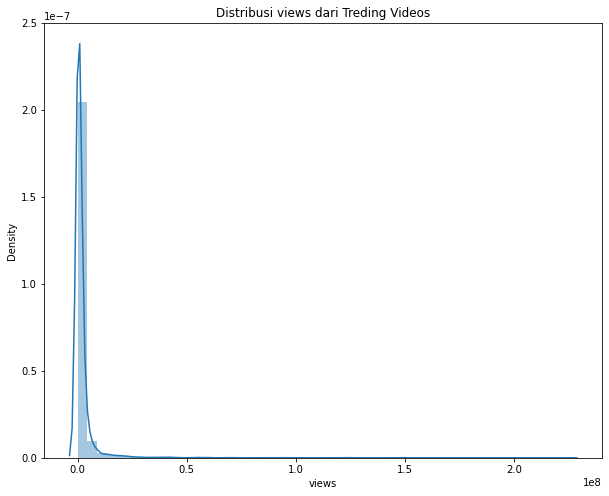

C:\Users\oktafransdy.it\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


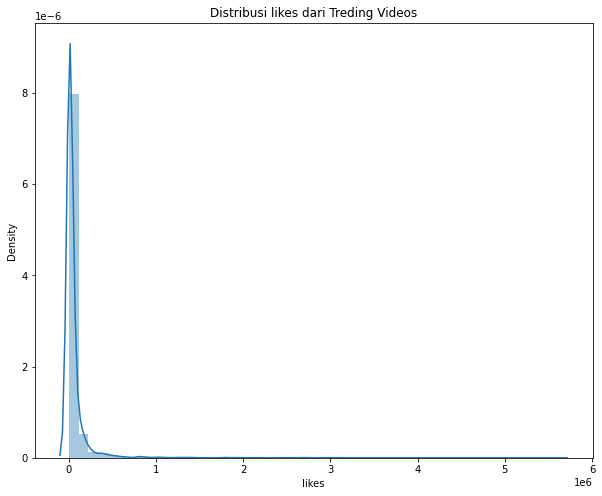

C:\Users\oktafransdy.it\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


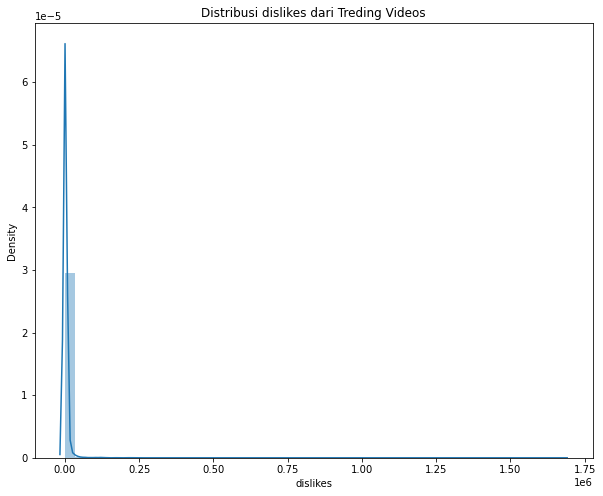

C:\Users\oktafransdy.it\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


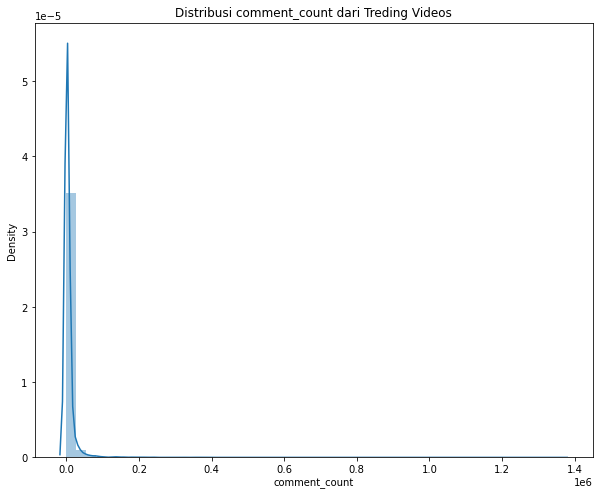

C:\Users\oktafransdy.it\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


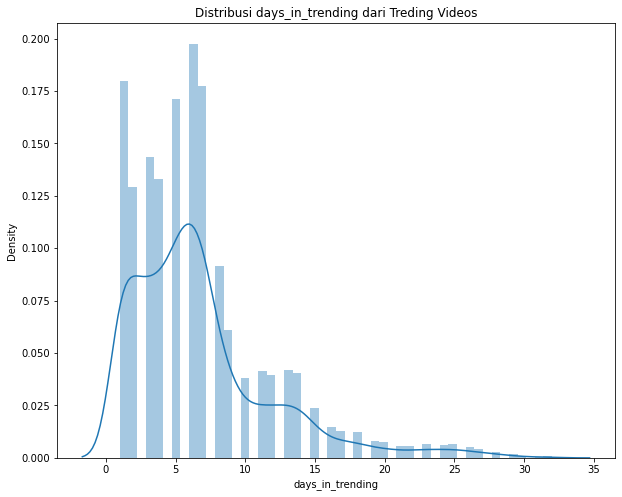

In [35]:
#Cek persebaran data numerikal dari DataFrame df_groupby_videoid
for i in ['views','likes','dislikes','comment_count','days_in_trending']:
    plt.figure(figsize=(10,8))
    sns.distplot(df_groupby_videoid[i],kde=True)
    plt.title('Distribusi {} dari Treding Videos'.format(i))
    plt.show()

In [36]:
# Cek distribusi kolom-kolom numerikal dari DataFrame df_groupby_videoid
from scipy.stats import normaltest
for i in ['views','likes','dislikes','comment_count','days_in_trending']:
    stats, pval=normaltest(df_groupby_videoid[i])
    if pval<=0.05:
        print('data {} terdistribusi tidak normal'.format(i)) #Ha
    else: 
        print('data {} terdistribusi normal'.format(i)) #Ho 

data views terdistribusi tidak normal
data likes terdistribusi tidak normal
data dislikes terdistribusi tidak normal
data comment_count terdistribusi tidak normal
data days_in_trending terdistribusi tidak normal


In [37]:
#karena distribusi kolom-kolom di atas tidak normal, kita gunakan median sebagai measure of central tendencies.
df_category_median = pd.DataFrame({
    'Video Count':df_groupby_videoid.reset_index().groupby('category_name').count()['video_id'],
    'Channel Count':df_groupby_videoid.reset_index().groupby('category_name')['channel_title'].nunique(),
    'Total Views':df_groupby_videoid.reset_index().groupby('category_name').median()['views'],
    'Total Likes':df_groupby_videoid.reset_index().groupby('category_name').median()['likes'],
    'Total Dislikes':df_groupby_videoid.reset_index().groupby('category_name').median()['dislikes'],
    'Total Comments':df_groupby_videoid.reset_index().groupby('category_name').median()['comment_count'],
    'Days in Trending': df_groupby_videoid.reset_index().groupby('category_name').median()['days_in_trending']
}).reset_index()

In [38]:
df_category_median

,category_name,Video Count,Channel Count,Total Views,Total Likes,Total Dislikes,Total Comments,Days in Trending
0,Autos & Vehicles,70,57,340780.5,2553.5,209.0,529.5,5.0
1,Comedy,544,142,790545.5,22900.5,791.5,1858.0,6.0
2,Education,251,67,370450.0,12549.0,329.0,1308.0,6.0
3,Entertainment,1618,474,606649.5,11749.0,490.5,1174.0,6.0
4,Film & Animation,318,140,910969.5,12317.0,605.5,1591.5,7.0
5,Gaming,103,65,1316002.0,36922.0,1333.0,5693.0,6.0
6,Howto & Style,594,189,426985.0,15910.0,394.5,1382.0,6.0
7,Music,801,441,1096158.0,39940.0,918.0,2615.0,7.0
8,News & Politics,505,112,180711.0,1179.0,298.0,739.0,5.0
9,Nonprofits & Activism,14,13,36963.5,1434.5,47.0,116.0,3.5


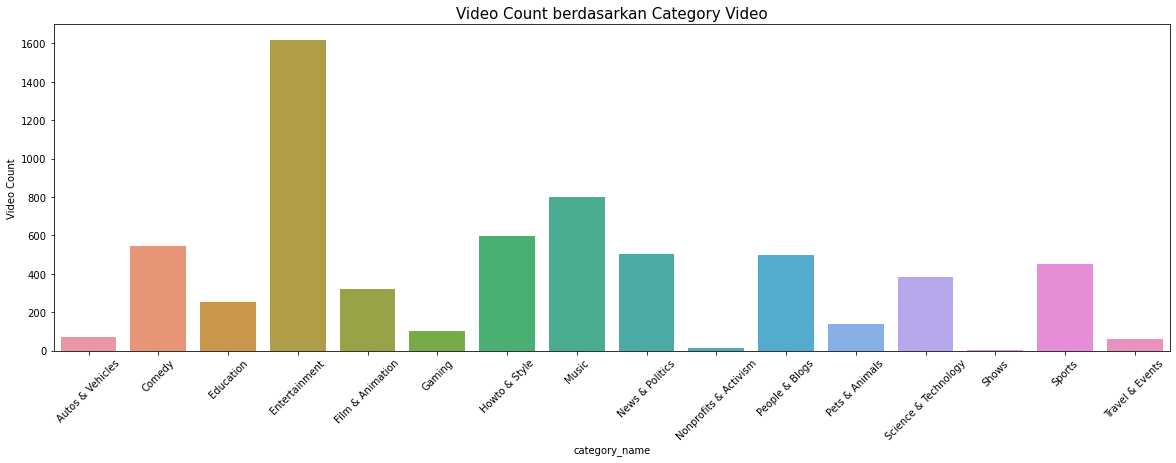

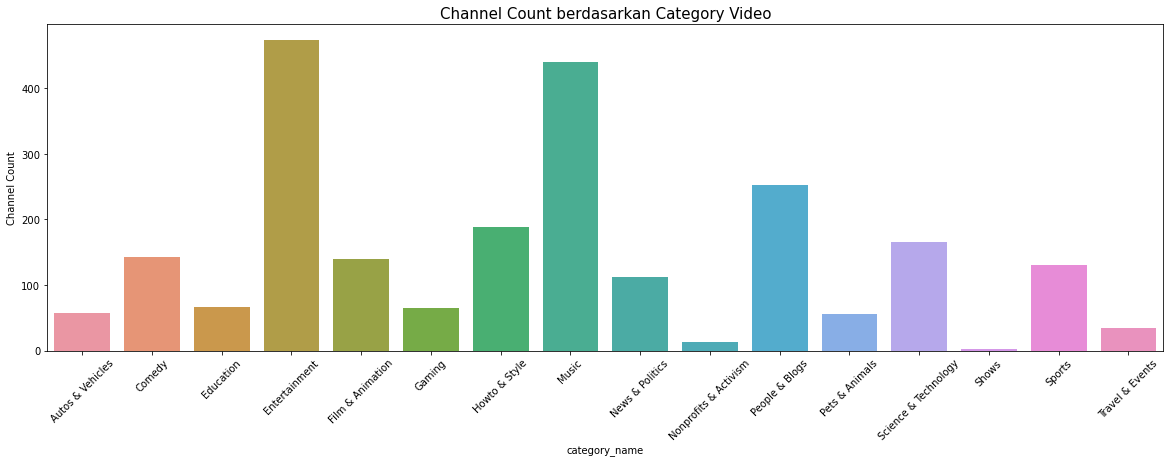

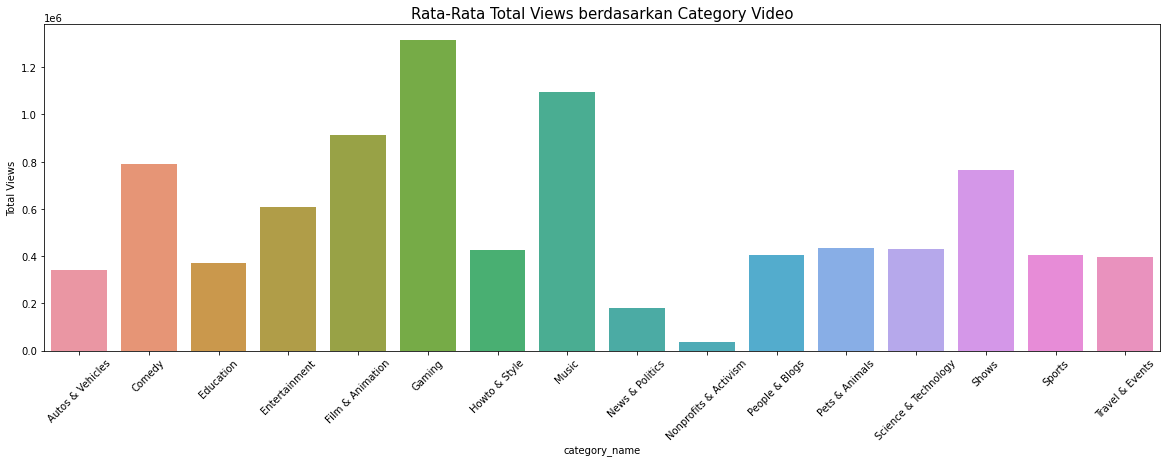

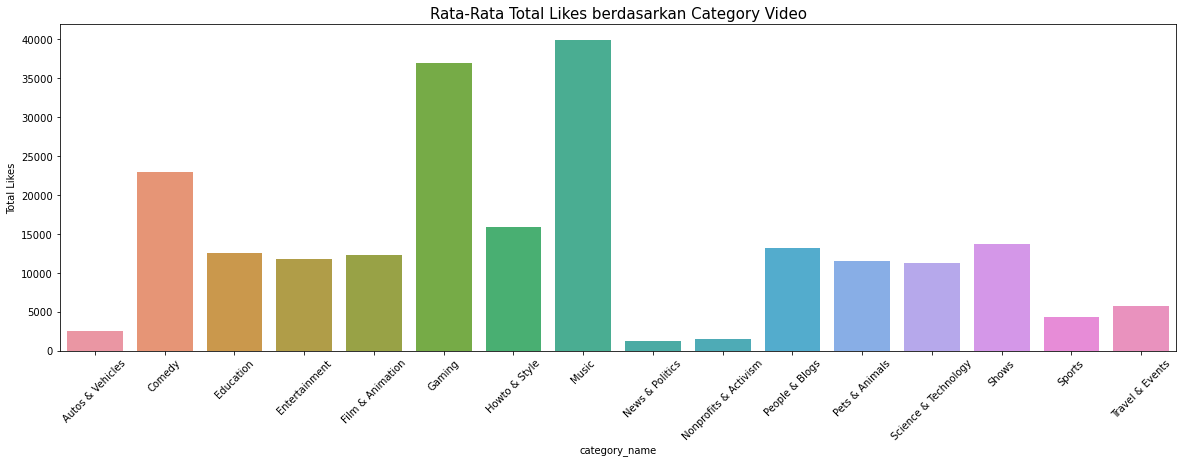

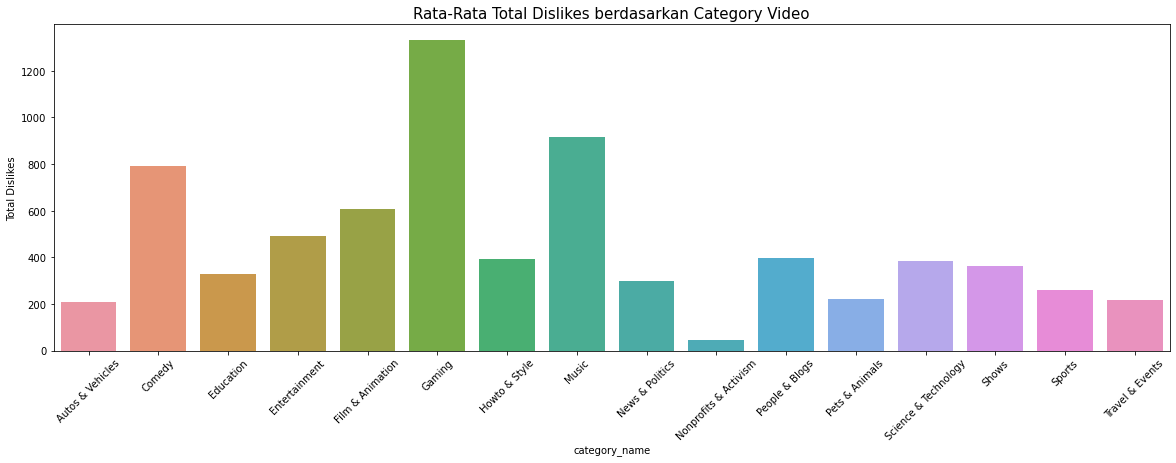

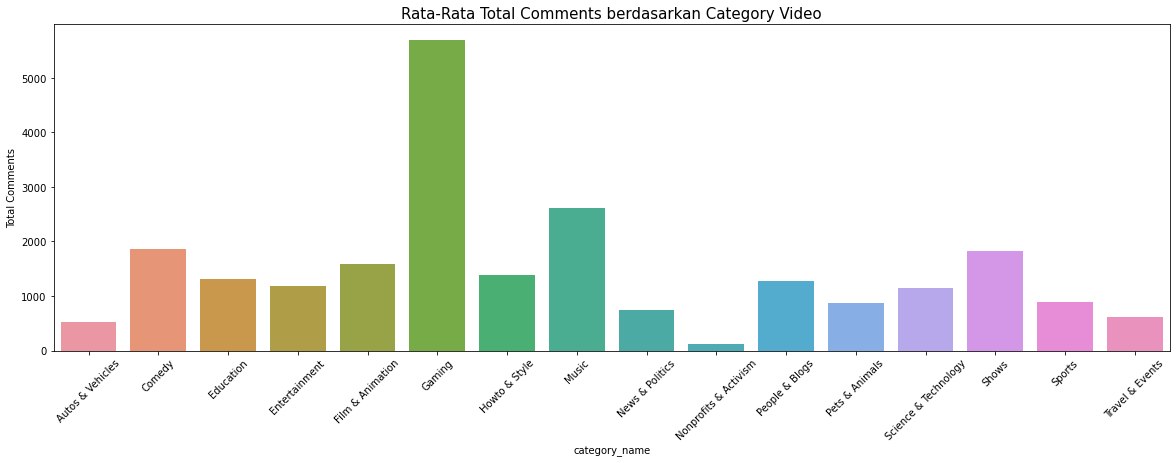

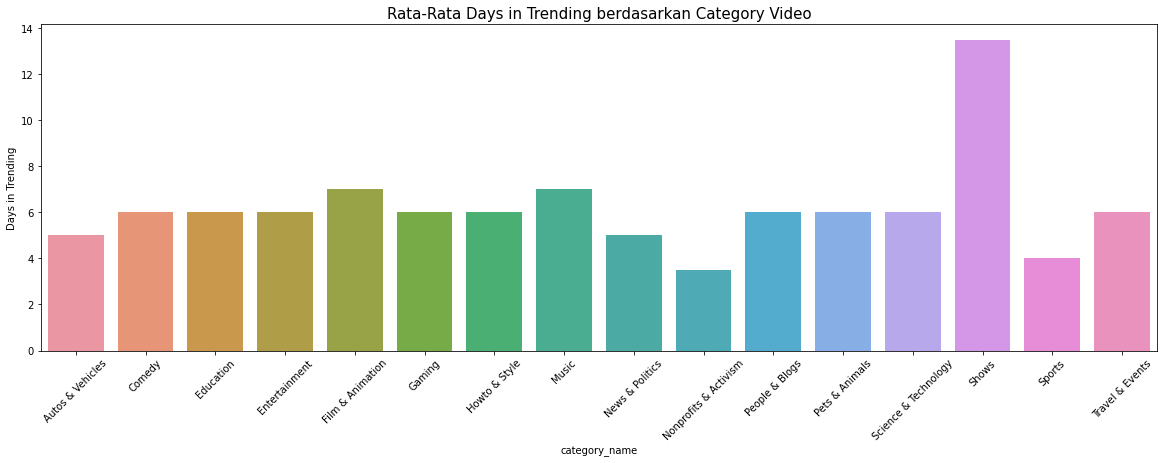

In [39]:
#Visualisasi Data Rata-Rata Metrics berdasarkan Category Video
for i in df_category_median.set_index('category_name').columns:
    plt.figure(figsize=(20,6))
    plt.xticks(rotation=45)
    sns.barplot(data=df_category_median,x='category_name',y=i)
    if i in ['Video Count', 'Channel Count']:
        plt.title('{} berdasarkan Category Video'.format(i),fontsize=15)
    else:
        plt.title('Rata-Rata {} berdasarkan Category Video'.format(i),fontsize=15)
    plt.show()


In [40]:
#Data Category Video diurutkan berdasarkan Total Views, Channel Count, dan Video Count
display(df_category_median.sort_values('Total Views',ascending=False))
display(df_category_median.sort_values('Total Likes',ascending=False))
display(df_category_median.sort_values('Channel Count',ascending=False))
display(df_category_median.sort_values('Video Count',ascending=False))

,category_name,Video Count,Channel Count,Total Views,Total Likes,Total Dislikes,Total Comments,Days in Trending
5,Gaming,103,65,1316002.0,36922.0,1333.0,5693.0,6.0
7,Music,801,441,1096158.0,39940.0,918.0,2615.0,7.0
4,Film & Animation,318,140,910969.5,12317.0,605.5,1591.5,7.0
1,Comedy,544,142,790545.5,22900.5,791.5,1858.0,6.0
13,Shows,4,2,765522.0,13675.0,361.0,1823.5,13.5
3,Entertainment,1618,474,606649.5,11749.0,490.5,1174.0,6.0
11,Pets & Animals,139,56,433420.0,11486.0,220.0,875.0,6.0
12,Science & Technology,381,166,429830.0,11229.0,382.0,1143.0,6.0
6,Howto & Style,594,189,426985.0,15910.0,394.5,1382.0,6.0
14,Sports,452,131,404861.0,4332.0,259.5,888.0,4.0


,category_name,Video Count,Channel Count,Total Views,Total Likes,Total Dislikes,Total Comments,Days in Trending
7,Music,801,441,1096158.0,39940.0,918.0,2615.0,7.0
5,Gaming,103,65,1316002.0,36922.0,1333.0,5693.0,6.0
1,Comedy,544,142,790545.5,22900.5,791.5,1858.0,6.0
6,Howto & Style,594,189,426985.0,15910.0,394.5,1382.0,6.0
13,Shows,4,2,765522.0,13675.0,361.0,1823.5,13.5
10,People & Blogs,497,253,404058.0,13166.0,399.0,1267.0,6.0
2,Education,251,67,370450.0,12549.0,329.0,1308.0,6.0
4,Film & Animation,318,140,910969.5,12317.0,605.5,1591.5,7.0
3,Entertainment,1618,474,606649.5,11749.0,490.5,1174.0,6.0
11,Pets & Animals,139,56,433420.0,11486.0,220.0,875.0,6.0


,category_name,Video Count,Channel Count,Total Views,Total Likes,Total Dislikes,Total Comments,Days in Trending
3,Entertainment,1618,474,606649.5,11749.0,490.5,1174.0,6.0
7,Music,801,441,1096158.0,39940.0,918.0,2615.0,7.0
10,People & Blogs,497,253,404058.0,13166.0,399.0,1267.0,6.0
6,Howto & Style,594,189,426985.0,15910.0,394.5,1382.0,6.0
12,Science & Technology,381,166,429830.0,11229.0,382.0,1143.0,6.0
1,Comedy,544,142,790545.5,22900.5,791.5,1858.0,6.0
4,Film & Animation,318,140,910969.5,12317.0,605.5,1591.5,7.0
14,Sports,452,131,404861.0,4332.0,259.5,888.0,4.0
8,News & Politics,505,112,180711.0,1179.0,298.0,739.0,5.0
2,Education,251,67,370450.0,12549.0,329.0,1308.0,6.0


,category_name,Video Count,Channel Count,Total Views,Total Likes,Total Dislikes,Total Comments,Days in Trending
3,Entertainment,1618,474,606649.5,11749.0,490.5,1174.0,6.0
7,Music,801,441,1096158.0,39940.0,918.0,2615.0,7.0
6,Howto & Style,594,189,426985.0,15910.0,394.5,1382.0,6.0
1,Comedy,544,142,790545.5,22900.5,791.5,1858.0,6.0
8,News & Politics,505,112,180711.0,1179.0,298.0,739.0,5.0
10,People & Blogs,497,253,404058.0,13166.0,399.0,1267.0,6.0
14,Sports,452,131,404861.0,4332.0,259.5,888.0,4.0
12,Science & Technology,381,166,429830.0,11229.0,382.0,1143.0,6.0
4,Film & Animation,318,140,910969.5,12317.0,605.5,1591.5,7.0
2,Education,251,67,370450.0,12549.0,329.0,1308.0,6.0


In [41]:
# Uji Chi-Squared untuk menentukan apakah Category Video berpengaruh terhadap Views, Likes, Dislikes, dan Comment dari sebuah Video.
from scipy.stats import chi2_contingency

stat,p_value,dof,expected = chi2_contingency(df_category_median.set_index('category_name')[['Total Views','Total Likes','Total Dislikes','Total Comments']])

print('P-Value:',p_value)

if(p_value <= 0.05):
    print('Dependent (Reject H0)')
else:
    print('Independent (Accept H0)')

P-Value: 0.0
Dependent (Reject H0)


Hasil uji Chi-Squared menunjukkan bahwa <b>Category Video</b> berpengaruh signifikan terhadap metrics penilaian Youtube (<i>Total Views</i>, <i>Total Likes</i>, <i>Total Dislikes</i>, dan <i>Total Comment</i>) apakah Video tersebut akan masuk ke Trending atau tidak.

# Kesimpulan dan Rekomendasi

Dari pemrosesan data dan analisis data yang telah dilakukan di atas, dapat disimpulkan bahwa:
- Data sebanyak 40949 dari dataset ternyata hanya terdiri dari 6,351 Video.
- Category Video dengan jumlah Video trending terbanyak adalah Entertainment, dengan jumlah 1,618 video.
- Category Video dengan jumlah Channel yang videonya masuk ke dalam Trending Page terbanyak juga adalah Entertainment, dengan jumlah channel 474.
- Category Video dengan rata-rata jumlah Views terbesar adalah Gaming, dengan jumlah rata-rata views 1,316,002. Disusul oleh Music dan Film & Animation pada posisi ke 2 dan 3.
- Category Video dengan Rata-rata lama Video berada di Trending Page paling tinggi adalah Shows. Namun jumlah video yang dimiliki pada dataset sangat sedikit, sehingga tidak disarankan untuk menarik kesimpulan dari data ini. Rata-rata lama video berada di Trending Page per Category Video umumnya antara 4-7 hari.

## Rekomendasi

- Apabila perusahaan ingin membuat Video yang memiliki kemungkinan paling besar untuk masuk ke dalam Youtube Trending Page, maka disarankan untuk membuat video dengan Category Entertainment. Karena dari analisa data dapat terlihat bahwa ada 1,618 video entertainment dari total 6,351 data Video ada di dataset. 
- Apabila perusahaan ingin membuat Video yang memiliki jumlah view yang besar, maka disarankan untuk membuat video dengan Category Gaming. Pada data diatas dapat dilihat bahwa rata-rata Views pada Video Gaming yang trending di youtube adalah 1,316,002 Views.